# Clustering
#### Завдання:
Агломеративний алгоритм AgglomerativeClustering. Дослiдити методи розрахунку вiдстанi мiж кластерами: ward, single, average, complete. \
Метрики якостi: Estimated number of clusters, Adjusted Rand Index, Vmeasure. Побудувати матрицi вiдстаней мiж кластерами, використовуючи metrics.pairwise_distances. \
Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?
#### Початковi данi:
(а)  `sklearn.datasets.make_moons` <br>
(б) <code>from sklearn.datasets.samples_generator import make_blobs
    X1, y_true = make_blobs(n_samples=400000, centers=4,
        cluster_std=0.60, random_state=0)
    rng = np.random.RandomState(13)
    X = np.dot(X1, rng.randn(2, 2))
</code>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import pairwise_distances

from sklearn.cluster import AgglomerativeClustering

import time

### 1. Представити дані графічно:

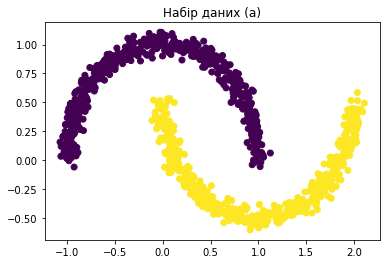

In [2]:
# (a)
X_a, Y_a = make_moons(n_samples=1000, noise=0.05)

fig, ax = plt.subplots()
ax.scatter(X_a[:, 0], X_a[:, 1], c=Y_a.astype(float))
ax.set_title('Набір даних (а)');

In [3]:
# (б) (Кількість точок зменшена до 20000 через складність обчислень)
X1, Y_b = make_blobs(n_samples=20000, centers=4, 
                        cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X_b = np.dot(X1, rng.randn(2, 2))

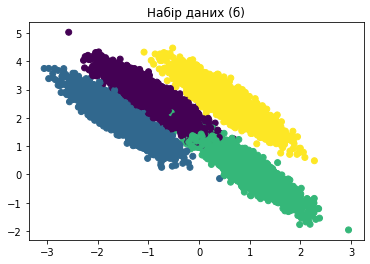

In [4]:
centers = np.unique(Y_b)
fig, ax = plt.subplots()
ax.scatter(X_b[:, 0], X_b[:, 1], c=Y_b.astype(float))

ax.set_title('Набір даних (б)');

### 2. Побудувати моделі кластеризації:

In [5]:
A = [
    AgglomerativeClustering(linkage='single'),
    AgglomerativeClustering(linkage='ward'),
    AgglomerativeClustering(linkage='average'),
    AgglomerativeClustering(linkage='complete')
]

In [6]:
B = [
    AgglomerativeClustering(linkage='single', n_clusters=4),
    AgglomerativeClustering(linkage='ward', n_clusters=4),
    AgglomerativeClustering(linkage='average', n_clusters=4),
    AgglomerativeClustering(linkage='complete', n_clusters=4)
]

### 3. Виконати кластеризацію:

In [7]:
A_time = []
for model in A:
    start = time.time()
    model.fit(X_a)
    A_time.append(time.time() - start)

In [8]:
B_time = []
for model in B:
    start = time.time()
    model.fit(X_b)
    B_time.append(time.time() - start)

### 4. Представити розбиття графічно:

In [9]:
def plot_models(models, X):
    linkages = ['single', 'ward', 'average', 'complete']
    fig, axes = plt.subplots(ncols=4, figsize=(20,4))
    for i, model in enumerate(models):
        labels = model.labels_
        axes[i].scatter(X[:, 0], X[:, 1], c=labels)
        axes[i].set_title(linkages[i])

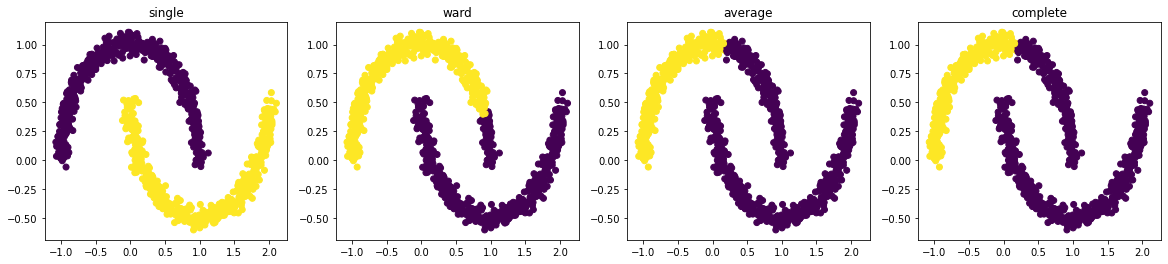

In [10]:
plot_models(A, X_a)

Найкраще алгоритм спрацьовує з параметром linkage='single'

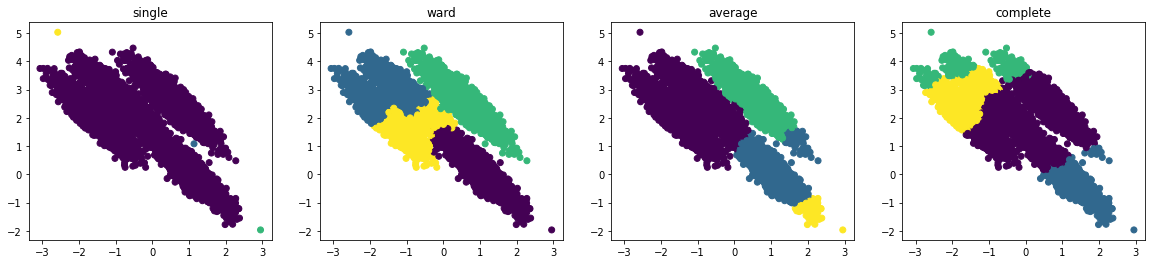

In [11]:
plot_models(B, X_b)

Досить близьким до істини вийшло розбиття, обчислене з параметром linkage='ward'

### 5. Розрахувати час кластеризації:

In [12]:
def print_time(models, times):
    for i, model in enumerate(models):
        print(f'{times[i]} s. linkage = {model.get_params()["linkage"]}')

In [13]:
print_time(A, A_time)

0.07431697845458984 s. linkage = single
0.015668153762817383 s. linkage = ward
0.015614986419677734 s. linkage = average
0.015623331069946289 s. linkage = complete


In [14]:
print_time(B, B_time)

2.3188374042510986 s. linkage = single
13.550047159194946 s. linkage = ward
16.140602827072144 s. linkage = average
12.49002480506897 s. linkage = complete


Найшвидше алгоритм працює з параметром прив'язки 'single'.

### 6. Розрахувати метрики якості:

In [15]:
def eval_metrics(models, target):
    for model in models:
        print(f'Linkage {model.get_params()["linkage"]}:')
        print(f'    adjusted_rand_score: {adjusted_rand_score(target, model.labels_)}')
        print(f'    v_measure_score: {v_measure_score(target, model.labels_)}\n')

In [16]:
eval_metrics(A, Y_a)

Linkage single:
    adjusted_rand_score: 1.0
    v_measure_score: 1.0

Linkage ward:
    adjusted_rand_score: 0.7531812390481872
    v_measure_score: 0.7104232142426273

Linkage average:
    adjusted_rand_score: 0.3085803283651177
    v_measure_score: 0.3856457593879122

Linkage complete:
    adjusted_rand_score: 0.3085803283651177
    v_measure_score: 0.3856457593879122



In [17]:
eval_metrics(B, Y_b)

Linkage single:
    adjusted_rand_score: -1.0000500125011253e-08
    v_measure_score: 0.0002996518896944185

Linkage ward:
    adjusted_rand_score: 0.6865631194231615
    v_measure_score: 0.7462761101102644

Linkage average:
    adjusted_rand_score: 0.6692885080052827
    v_measure_score: 0.7895594210303861

Linkage complete:
    adjusted_rand_score: 0.2042549097512131
    v_measure_score: 0.3592676014125047



In [18]:
print('Матриця відстаней між кластерами:\n')
print(pairwise_distances(X_a[np.where(A[0].labels_ == 0)], X_a[np.where(A[0].labels_ == 1)]))

Матриця відстаней між кластерами:

[[1.45607919 2.28034014 2.01204538 ... 2.07753778 1.75375218 2.22780854]
 [0.63414752 0.97637253 0.53792556 ... 0.60469807 0.52485419 0.76789573]
 [1.66622584 2.86362496 2.41680514 ... 2.4758599  2.03843926 2.71590056]
 ...
 [1.4428225  2.86293837 2.27326578 ... 2.32335522 1.82890756 2.62805789]
 [1.55677184 2.37318058 2.11550166 ... 2.1810617  1.85722212 2.32810901]
 [1.63571654 2.89927496 2.41343462 ... 2.47044719 2.01512085 2.72858058]]


### 7. Чи є розбиття стабільним після видалення окремих об'єктів?

In [19]:
rows = np.random.randint(low=0, high=X_a.shape[0], size=(100,))
X_a_test = np.delete(X_a, rows, axis=0)
Y_a_test = np.delete(Y_a, rows)

In [20]:
for model in A:
    model.fit(X_a_test)
    
eval_metrics(A, Y_a_test)

Linkage single:
    adjusted_rand_score: 1.0
    v_measure_score: 1.0

Linkage ward:
    adjusted_rand_score: 0.18442141568673204
    v_measure_score: 0.1441234512910137

Linkage average:
    adjusted_rand_score: 0.29182146111727836
    v_measure_score: 0.37685027258878623

Linkage complete:
    adjusted_rand_score: 0.2660328699711441
    v_measure_score: 0.21455202288782857



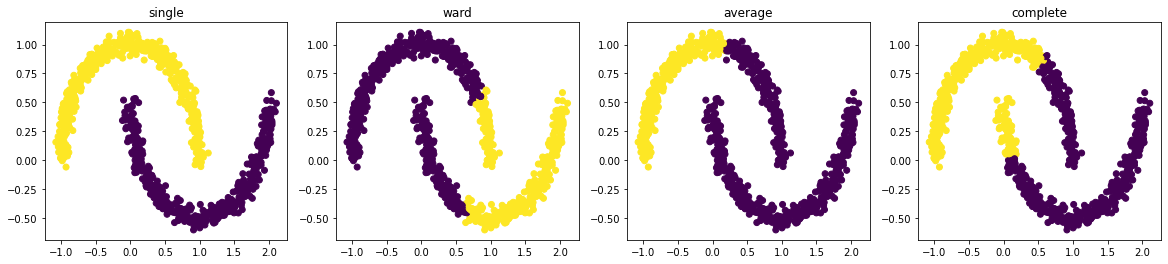

In [21]:
plot_models(A, X_a_test)

Порівнявши з попередніми метриками, можемо сказати, що розбиття залишається стабільним.

### Висновок
В кінці можемо сказати, що даний метод кластеризації є стабільним при видаленні окремих об'єктів, але потребує правильного вибору параметра linkage. До того ж, цей алгоритм кластеризації є досить ресурсозатратним, оскільки для обчислення оригінального набору даних Б знадобилося б досить багато часу.